In [191]:
# exemple sur les injections à l'isocortex
import pandas as pd
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ test 1 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
""" 
mcc = MouseConnectivityCache()

structure_tree = mcc.get_structure_tree()
isocortex_id = structure_tree.get_structures_by_name(['Isocortex'])[0]['id']                             
injection_regions_ids = [isocortex_id]

experiments = mcc.get_experiments(dataframe=True, injection_structure_ids=injection_regions_ids)
print("%d total experiments" % len(experiments))

#tests to retrieve à specific coordinate/id

#print(structure_tree.get_structures_by_name(['Isocortex'])[0])
#experiments.loc[180436360]
#experiments.loc[180436360]['injection-structures'][0]['id']
experiments.loc[180436360]['injection-coordinates']
experiments['injection-coordinates']
experiments
# i want the id of thoses coordinate... [5520, 4470, 10080]
"""
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ test 2 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
mcc = MouseConnectivityCache()

# open up a list of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
print("%d total experiments" % len(all_experiments))

#all_experiments.iat[0,2]
#all_experiments.loc[180436360]['injection-coordinates']
#all_experiments.loc[:,['injection-coordinates'][0]]
#all_experiments['injection-coordinates']
#all_experiments['injection-coordinates'].loc[180436360]
all_experiments['injection-coordinates']
df = pd.DataFrame({"pear": [1,2,3], "apple": [2,3,4], "orange": [3,4,5]})
df
all_experiments.columns.get_loc('injection-coordinates')
list(df.columns).index('pear')
df.loc[1]

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ test 3 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

""" the formula to get the id from a coordinate is :df.index[df['column_name']==value].tolist()
    we are searching how to match the equality of the injection coordinates ...
"""
coordinates = [5520, 4470, 10080]

df.index[df['pear']==1].tolist() # 0
#all_experiments.index[all_experiments['injection-coordinates'] == [5520, 4470, 10080]] 
all_experiments['injection-coordinates']

all_experiments.iat[0,2] == all_experiments.iat[0,2] # True
type(all_experiments.iat[0,2]) # List

all_experiments[all_experiments['injection-coordinates'].map(set(coordinates).issubset)]

id = all_experiments.index[all_experiments['injection-coordinates'].map(set(coordinates).issubset)].tolist() 
# all_experiments.index[all_experiments['gender']=='M'] # list of ids

print(id[0])


2917 total experiments
180436360


In [2]:
experiment_id = 180436360

In [8]:
# projection density: number of projecting pixels / voxel volume
pd, pd_info = mcc.get_projection_density(experiment_id)

# injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(experiment_id)

# injection fraction: number of pixels in injection site / voxel volume
inf, inf_info = mcc.get_injection_fraction(experiment_id)

# data mask:
# binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(experiment_id)

template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

# in addition to the annotation volume, you can get binary masks for individual structures
# in this case, we'll get one for the isocortex
cortex_mask, cm_info = mcc.get_structure_mask(315)

#print(pd_info)
#print(pd.shape, template.shape, annot.shape)

In [9]:
import nrrd
file_name = 'experiment_180436360/projection_density_25.nrrd'
data_array, metadata = nrrd.read(file_name)

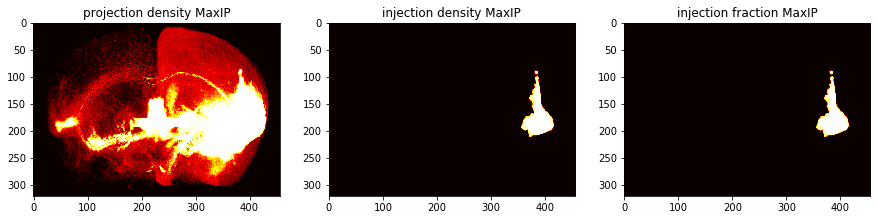

In [9]:
import matplotlib.pyplot as plt
# compute the maximum intensity projection (along the anterior-posterior axis) of the projection data
pd_mip = pd.max(axis=0)
ind_mip = ind.max(axis=0)
inf_mip = inf.max(axis=0)

# show that slice of all volumes side-by-side
f, pr_axes = plt.subplots(1, 3, figsize=(15, 6))

pr_axes[0].imshow(pd_mip, cmap='hot', aspect='equal')
pr_axes[0].set_title("projection density MaxIP")

pr_axes[1].imshow(ind_mip, cmap='hot', aspect='equal')
pr_axes[1].set_title("injection density MaxIP")

pr_axes[2].imshow(inf_mip, cmap='hot', aspect='equal')
pr_axes[2].set_title("injection fraction MaxIP")

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

mcc = MouseConnectivityCache()

"""demarche envisagée:

    1. recuperer un id en fonction de coordonnées ou de region sur les experiences du allen (possible ????)
       | 
        `-->  all_experiments.index[all_experiments['injection-coordinates'].map(set(coordinates).issubset)].tolist() 
   
       OU 
       
       essayer avec le dataset en csv? (volume inclus)
   
    2. recuperer la density de cette injection ***> volume ??  \
                                                                ) OU afficher img ??
    3. recuperer la position de cette density  ***> roi ??     /

    4. ecrire une fonction
        a. option1:

            def fluorescence_volume(injection_regions):
                volume = 0 
                rois = []
                OU  
                afficher image ?
                return volume, rois

        b. option2:

            def fluorescence_volume(injection_coordinates):
                volume = 0
                rois = []
                OU
                afficher image ?
                return volume, rois

    5. appel de la fonction  

"""
def load_allen_experiments():
    # open up a list of all of the experiments
    return MouseConnectivityCache().get_experiments(dataframe=True)

def get_id_from_injection_coord(x,y,z):
    injection_coord = [x, y, z]
    all_experiments = load_allen_experiments()
    experiment_id = all_experiments.index[all_experiments['injection-coordinates'].map(set(injection_coord).issubset)].tolist() 
    return experiment_id[0]


